In [1]:
import os 
os.chdir(os.environ['PYTHONPATH'])

In [2]:
from nltk.lm.models import Lidstone, KneserNeyInterpolated

from code.model_selection import get_train_set, LMDef
from code.sentence_scores import kfold_score_generated_sentences, plot_pandas

In [3]:
# for each order (2, 3, 4) and model type (Lidstone, Kneser-Ney) we have 
# the hyperparameters which minimize entropy on cross-validation test sets.

# out of these models we want to pick the one that generates the "best" 
# sentences. yes this is totally subjective to me! ha ha 

best_model_defs = [
    LMDef(Lidstone, [0.0040, 2]),
    LMDef(Lidstone, [0.0006, 3]),
    LMDef(Lidstone, [0.0002, 4]),
    LMDef(KneserNeyInterpolated, [2], {'discount': 0.50}),
    LMDef(KneserNeyInterpolated, [3], {'discount': 0.44}),
    LMDef(KneserNeyInterpolated, [4], {'discount': 0.28}),
]


score_filename = 'data/sentence_scores/model_{}_fold_{}.txt'


In [4]:
# we will score each generated sentence from -2 to 3. overfitting is penalized!

score_rubric = '''
-2: literally a lyric
-1: u hav overfit
 0: perfect, beautiful
 1: is good enough
 2: bad
 3: garbagé
'''


In [5]:
data = get_train_set()


In [6]:
kfold_score_generated_sentences(best_model_defs, data)


training models...

-2: literally a lyric
-1: u hav overfit
 0: perfect, beautiful
 1: is good enough
 2: bad
 3: garbagé

(type "quit" to quit)

one that 's a place where i do you hear all
rate this sentence (-2 to 3): 2

it must have to be afraid
rate this sentence (-2 to 3): 1

spring breaks loose , the feeling i 've got bad blood , hey , hey
rate this sentence (-2 to 3): quit


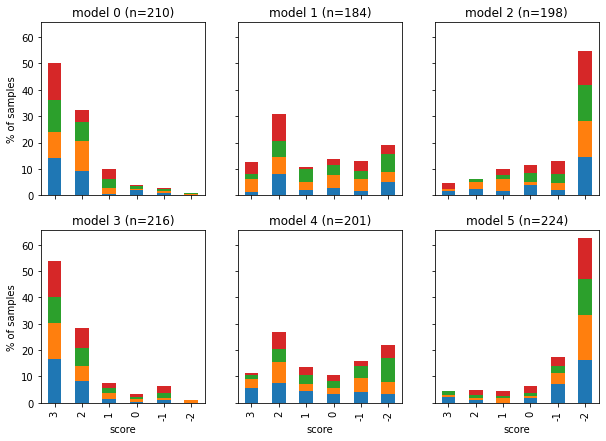

In [7]:
# count up results and plot them 

plot_pandas()

In [8]:
# top row is lidstone models, bottom row is KN models, 
# orders are 2, 3, 4 from left to right 

# as would be expected, the lower order gram models produce more garbagé,
# while higher order ones tend to overfit. the trigram ones seem like a 
# good balance but there is still a large proportion of "bad"s which is not
# exciting! maybe with more data in practice they will be less bad? 

# between the trigram lidstone vs kn-interpolated we did get a lower average
# test entropy from the kn one, so since these sanity-check graphs are
# roughly the same we will go with the trigram kn-interpolated model.